In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [25]:
from operator import itemgetter

def orderDict(x: dict, desc=True):
    return sorted(x.items(), key=itemgetter(1), reverse=desc)

In [26]:
g = nx.Graph()
g.add_edges_from(
    [
        ('A', 'B'), ('B', 'D'), ('C', 'A'), 
        ('C', 'D'), ('C', 'E'), ('D', 'E'), 
        ('E', 'G'), ('G', 'D'), ('G', 'F')
    ]
)

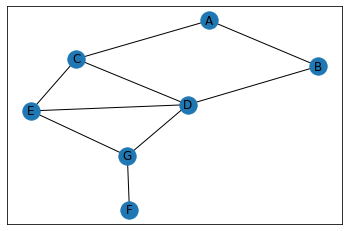

In [28]:
pos = nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos)

# 1. (0/1)

In [29]:
q1 = nx.degree_centrality(g)['D']
q1

0.6666666666666666

# 2. (0/1)

In [30]:
q2 = nx.closeness_centrality(g)['G']
q2

0.6

# 3. (0/1)

In [31]:
q3 = nx.betweenness_centrality(g, endpoints=False)['G']
q3

0.3333333333333333

# 4. (0/1)

In [32]:
q4 = nx.edge_betweenness_centrality(g, normalized=False)
q4['G', 'F']

6.0

# 5. (0/1)

[x] We can use subsets...

[x] The assumption of degree centrailty...

[x] The closeness centrality...

# 6. (0/1)

[x] The authority and hub score...

[x] Nodes with high in-degree...

[x] Addin in-links of a node...

# 7. (0/1)

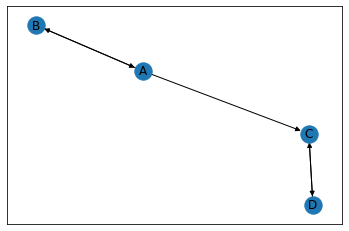

In [42]:
g = nx.MultiDiGraph()
g.add_edges_from([('B', 'A'), ('A', 'C'), ('C', 'D'), ('D', 'C'), ('A', 'B')])

nx.draw_networkx(g)

/home/f4119597/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


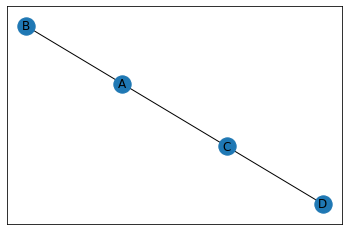

In [47]:
g_single = nx.Graph(g.to_undirected())

nx.draw_networkx(g_single)

In [54]:
orderDict(nx.pagerank(g_single))

[('A', 0.32456160227748465),
 ('C', 0.32456160227748465),
 ('B', 0.17543839772251535),
 ('D', 0.17543839772251535)]

In [57]:
a_d = {}
for a in [0.5, 0.95, 0.9, 0.8]:
    a_d[str(a)] = nx.pagerank(G=g_single, alpha=a)['D']  

orderDict(a_d)[0]

q7 = orderDict(a_d)[0][0]
q7

'0.5'

# 8. (0/1)

In [62]:
g = nx.MultiDiGraph()
g.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'A'), ('D', 'C')])

[0, 0, 0, 0, 0]

In [63]:
g_single = nx.Graph(g.to_directed())

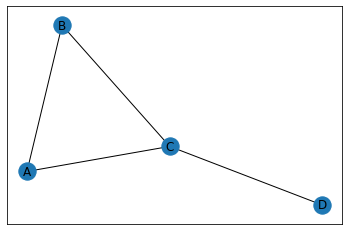

In [69]:
nx.draw_networkx(g_single)

We have to calculate it by hand

There are 04 nodes in our graph

Then, each node starts with a PageRank of ```1/4```

Since node 'C' has edges to 'A', 'B' and 'D', he will receive, from each node:

``` pageRank(node) * 1/degree(node)```

Which leads us to:

In [76]:
base_PageRank = 1/len(g_single.edges())

In [77]:
# step k = 0
degree_A = len(g_single['A'])
degree_B = len(g_single['B'])
degree_D = len(g_single['D'])

In [90]:
# step k = 1
pageRank_C = ( 
                (base_PageRank * 1/degree_A)
                + (base_PageRank * 1/degree_B)
                + (base_PageRank * 1/degree_D)
            )

q8 = pageRank_C
q8

0.5

# 9. (0/1)

# 10. (0/1)